# Representacion de gráficas

### Gráficas de los datos de poder descriptivo 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

### Pecho

In [22]:
#Cargar datos
xPe, yPe = np.loadtxt("breast_ajuste.txt",delimiter="\t", unpack=True)

In [23]:
# DEFINIMOS LAS FUNCIONES DE LOS MODELOS
def modelo_exponencial(t):
    p=(106.277,0.076)
    return p[0]*np.exp(p[1]*t)

def modelo_exponencial_lineal(t):
    p=(1, 1)
    return p[0]*np.exp(t)

def modelo_exponencial1(t):
    p=(0.327,1)
    return 1*np.exp(p[0]*t)

def modelo_logistico(t):
    p = (0.302, 1479.278)
    return (p[1]*1*np.exp(p[0]*t))/(p[1]+1*np.exp(p[0]*t)-1)

def modelo_lgeneralizado(t):
    p=(20.691, 0.004, 2468.852)
    return((p[2])/((1**p[1]+(p[2]**p[1]-1**p[1])*np.exp(-p[0]*p[1]*t))**(1/p[1])))

def modelo_gompertz(t):
    p = (0.597, 0.076)
    return 1*np.exp((p[0]/p[1])*(1-np.exp(-p[1]*t)))

def modelo_Bertalanffy(t):
    p=(0.921, 0.230, 0.838, 4.941)
    return ((p[0]/p[1])+(p[3]**(1-p[2])-(p[0]/p[1]))*np.exp(-p[1]*t*(1-p[2])))**(1/(1-p[2]))

def modelo_Power_law(t):
    p=(0.526, 1.884)
    return ((p[0]*(p[1]**(1-p[0]))-(p[1]**(1-p[0]))-p[1]*t*(p[0]-1)**2)/(p[0]-1))**(-1/(p[0]-1))

#### Crecimiento de todos los modelos 

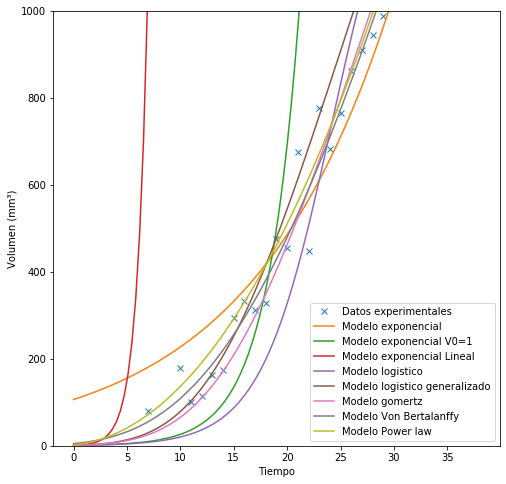

In [24]:
#Graficas de crecimiento segun modelo
plt.figure(figsize=(8,8))
tiempo= np.linspace(0.01, 36, 100)
plt.plot(xPe, yPe, 'x', label = 'Datos experimentales')
plt.plot(tiempo, modelo_exponencial(tiempo), label = 'Modelo exponencial')
plt.plot(tiempo, modelo_exponencial1(tiempo), label='Modelo exponencial V0=1')
plt.plot(tiempo, modelo_exponencial_lineal(tiempo), label = 'Modelo exponencial Lineal')
plt.plot(tiempo, modelo_logistico(tiempo), label = 'Modelo logistico')
plt.plot(tiempo, modelo_lgeneralizado(tiempo), label = 'Modelo logistico generalizado')
plt.plot(tiempo, modelo_gompertz(tiempo), label = 'Modelo gomertz')
plt.plot(tiempo, modelo_Bertalanffy(tiempo), label = 'Modelo Von Bertalanffy')
plt.plot(tiempo, modelo_Power_law(tiempo), label = 'Modelo Power law')
plt.ylim(0,1000)
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Volumen (mm³)')
plt.savefig('modelospecho.jpg')

#### Crecimiento relativo

In [25]:
#Graficas de crecimiento relativo
def crecim_relativo (t, modelo):
    RGR=[]
    for i in range(len(t)-1):
        S=modelo(t)
        num=np.log(S[i+1])-np.log(S[i])/(t[i+1]-t[i])
        RGR.append(num)
    return RGR

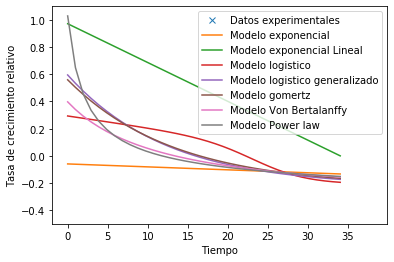

In [26]:
t= np.linspace(0, 35, 37)
t1=t[:-1]
plt.plot(xPe, yPe, 'x', label = 'Datos experimentales')
plt.plot(t1, crecim_relativo(t,modelo_exponencial), label = 'Modelo exponencial')
plt.plot(t1, crecim_relativo(t,modelo_exponencial_lineal), label = 'Modelo exponencial Lineal')
plt.plot(t1, crecim_relativo(t,modelo_logistico), label = 'Modelo logistico')
plt.plot(t1, crecim_relativo(t,modelo_lgeneralizado), label = 'Modelo logistico generalizado')
plt.plot(t1, crecim_relativo(t,modelo_gompertz), label = 'Modelo gomertz')
plt.plot(t1, crecim_relativo(t,modelo_Bertalanffy), label = 'Modelo Von Bertalanffy')
plt.plot(t1, crecim_relativo(t,modelo_Power_law), label = 'Modelo Power law')
plt.xlabel('Tiempo')
plt.ylabel('Tasa de crecimiento relativo')
plt.ylim(-0.5,1.1)
plt.legend()
plt.savefig('crecim_relativo_pecho.jpg')

### Pulmon

In [27]:
xPu, yPu = np.loadtxt("lung_ajuste.txt",delimiter="\t", unpack=True)

In [28]:
# DEFINIMOS LAS FUNCIONES DE LOS MODELOS
def modelo_exponencial(t):
    p=(81.771,0.134)
    return p[0]*np.exp(p[1]*t)

def modelo_exponencial1(t):
    p=(0.327,1)
    return 1*np.exp(p[0]*t)

def modelo_exponencial_lineal(t):
    p=(1, 1)
    return p[0]*np.exp(t)

def modelo_logistico(t):
    p = (0.462, 1637.694)
    return (p[1]*1*np.exp(p[0]*t))/(p[1]+1*np.exp(p[0]*t)-1)

def modelo_lgeneralizado(t):
    p=(1.055, 0.144, 2598.409)
    return((p[2])/((1**p[1]+(p[2]**p[1]-1**p[1])*np.exp(-p[0]*p[1]*t))**(1/p[1])))

def modelo_gompertz(t):
    p = (0.874, 0.108)
    return 1*np.exp((p[0]/p[1])*(1-np.exp(-p[1]*t)))

def modelo_Bertalanffy(t):
    p=(11.667, 10.828, 0.989, 0.147)
    return ((p[0]/p[1])+(p[3]**(1-p[2])-(p[0]/p[1]))*np.exp(-p[1]*t*(1-p[2])))**(1/(1-p[2]))

def modelo_Power_law(t):
    p=(0.591, 2.143)
    return ((p[0]*(p[1]**(1-p[0]))-(p[1]**(1-p[0]))-p[1]*t*(p[0]-1)**2)/(p[0]-1))**(-1/(p[0]-1))

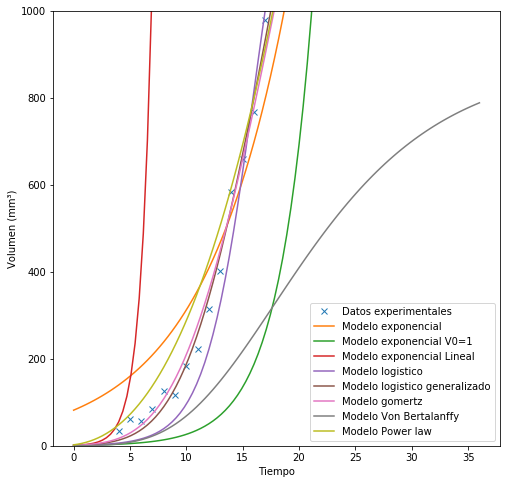

In [29]:
plt.figure(figsize=(8,8))
tiempo= np.linspace(0.01, 36, 100)
plt.plot(xPu, yPu, 'x', label = 'Datos experimentales')
plt.plot(tiempo, modelo_exponencial(tiempo), label = 'Modelo exponencial')
plt.plot(tiempo, modelo_exponencial1(tiempo), label='Modelo exponencial V0=1')
plt.plot(tiempo, modelo_exponencial_lineal(tiempo), label = 'Modelo exponencial Lineal')
plt.plot(tiempo, modelo_logistico(tiempo), label = 'Modelo logistico')
plt.plot(tiempo, modelo_lgeneralizado(tiempo), label = 'Modelo logistico generalizado')
plt.plot(tiempo, modelo_gompertz(tiempo), label = 'Modelo gomertz')
plt.plot(tiempo, modelo_Bertalanffy(tiempo), label = 'Modelo Von Bertalanffy')
plt.plot(tiempo, modelo_Power_law(tiempo), label = 'Modelo Power law')
plt.ylim(0,1000)
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Volumen (mm³)')
plt.savefig('modelospulmon.jpg')

#### Crecimiento relativo

In [30]:
#Graficas de crecimiento relativo
def crecim_relativo (t, modelo):
    RGR=[]
    for i in range(len(t)-1):
        S=modelo(t)
        num=np.log(S[i+1])-np.log(S[i])/(t[i+1]-t[i])
        RGR.append(num)
    return RGR

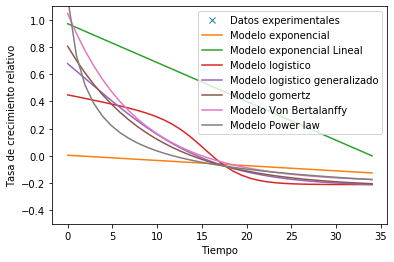

In [31]:
#plt.figure(figsize=(8,8))
t= np.linspace(0, 35, 37)
t1=t[:-1]
plt.plot(xPu, yPu, 'x', label = 'Datos experimentales')
plt.plot(t1, crecim_relativo(t,modelo_exponencial), label = 'Modelo exponencial')
plt.plot(t1, crecim_relativo(t,modelo_exponencial_lineal), label = 'Modelo exponencial Lineal')
plt.plot(t1, crecim_relativo(t,modelo_logistico), label = 'Modelo logistico')
plt.plot(t1, crecim_relativo(t,modelo_lgeneralizado), label = 'Modelo logistico generalizado')
plt.plot(t1, crecim_relativo(t,modelo_gompertz), label = 'Modelo gomertz')
plt.plot(t1, crecim_relativo(t,modelo_Bertalanffy), label = 'Modelo Von Bertalanffy')
plt.plot(t1, crecim_relativo(t,modelo_Power_law), label = 'Modelo Power law')
plt.xlabel('Tiempo')
plt.ylabel('Tasa de crecimiento relativo')
plt.ylim(-0.5,1.1)
plt.legend()
plt.savefig('crecim_relativo_pulmon.jpg')